# Hand Gesture Recognition

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from scipy.fft import fft, fftfreq

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/emg-4/1.csv
/kaggle/input/emg-4/3.csv
/kaggle/input/emg-4/2.csv
/kaggle/input/emg-4/0.csv


The EMG-4 dataset has 4 classes: rock - 0, scissors - 1, paper - 2, ok - 3.

In [3]:
rock_df = pd.read_csv("/kaggle/input/emg-4/0.csv", header=None)
scissors_df = pd.read_csv("/kaggle/input/emg-4/1.csv", header=None)
paper_df = pd.read_csv("/kaggle/input/emg-4/2.csv", header=None)
ok_df = pd.read_csv("/kaggle/input/emg-4/3.csv", header=None)

In [4]:
len(rock_df), len(scissors_df), len(paper_df), len(ok_df)

(2910, 2903, 2943, 2922)

In [5]:
rock_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [6]:
scissors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1
1,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
2,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
3,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
4,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1


In [7]:
rock_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,...,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.0
mean,-0.622680,-0.693471,-0.730584,-0.715120,0.076289,0.161856,-2.963230,-0.686598,-0.563574,-0.603436,...,-1.094845,-1.016151,-0.623368,-0.819588,-0.712027,-0.294158,-0.688316,-3.689691,-1.061168,0.0
std,25.581029,11.898513,6.208888,10.840904,12.900192,19.134960,48.548159,23.575177,24.994972,11.728397,...,23.469719,25.083376,11.686892,6.097475,10.821034,13.501056,18.522981,48.965415,24.052817,0.0
min,-116.000000,-99.000000,-27.000000,-73.000000,-55.000000,-93.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-70.000000,-115.000000,-128.000000,-124.000000,0.0
25%,-14.000000,-4.000000,-4.000000,-6.000000,-8.000000,-9.000000,-30.000000,-12.000000,-14.000000,-4.000000,...,-13.000000,-13.000000,-4.000000,-4.000000,-5.000000,-8.000000,-10.000000,-31.000000,-13.000000,0.0
50%,-2.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-4.000000,-1.000000,-2.000000,0.000000,...,-2.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-5.000000,-1.000000,0.0
75%,10.000000,3.000000,2.000000,5.000000,8.000000,8.750000,24.750000,10.000000,10.000000,3.000000,...,10.000000,9.000000,3.000000,2.000000,5.000000,7.000000,7.000000,24.000000,10.000000,0.0
max,111.000000,90.000000,34.000000,55.000000,65.000000,112.000000,127.000000,126.000000,127.000000,106.000000,...,114.000000,127.000000,105.000000,28.000000,45.000000,82.000000,102.000000,127.000000,127.000000,0.0


Combine dataframes

In [8]:
df = pd.concat([rock_df, scissors_df, paper_df, ok_df], ignore_index=True)

print(df.head())
print(df.iloc[:, -1].value_counts())

     0    1    2    3     4     5      6     7     8    9   ...    55    56  \
0  26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ... -28.0  61.0   
1 -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -25.0  47.0   
2 -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -83.0   7.0   
3   2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -38.0 -11.0   
4   6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...  38.0 -35.0   

    57   58    59    60    61     62    63  64  
0  4.0  8.0   5.0   4.0  -7.0  -59.0  16.0   0  
1  6.0  6.0   5.0  13.0  21.0  111.0  15.0   0  
2  7.0  1.0  -8.0   7.0  21.0  114.0  48.0   0  
3  4.0  7.0  11.0  33.0  39.0  119.0  43.0   0  
4 -8.0  2.0   6.0 -13.0 -24.0 -112.0 -69.0   0  

[5 rows x 65 columns]
64
2    2943
3    2922
0    2910
1    2903
Name: count, dtype: int64


In [9]:
sensor_data = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Data visualization

## Sensor signals

In [10]:
def plot_time_signals(dataframe, row_index, title):
    num_sensors = 8
    time_steps_per_sensor = dataframe.shape[1] // num_sensors

    row_data = dataframe.iloc[row_index, :-1]

    # Split the row into 8 groups corresponding to sensors
    signals = np.array_split(row_data.values, num_sensors)

    # Plot each sensor's signal
    plt.figure(figsize=(12, 6))
    for i, signal in enumerate(signals):
        plt.plot(signal, label=f'Sensor {i + 1}')
    
    plt.title(f"{title} (Row {row_index})")
    plt.xlabel("Time Steps")
    plt.ylabel("Signal Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

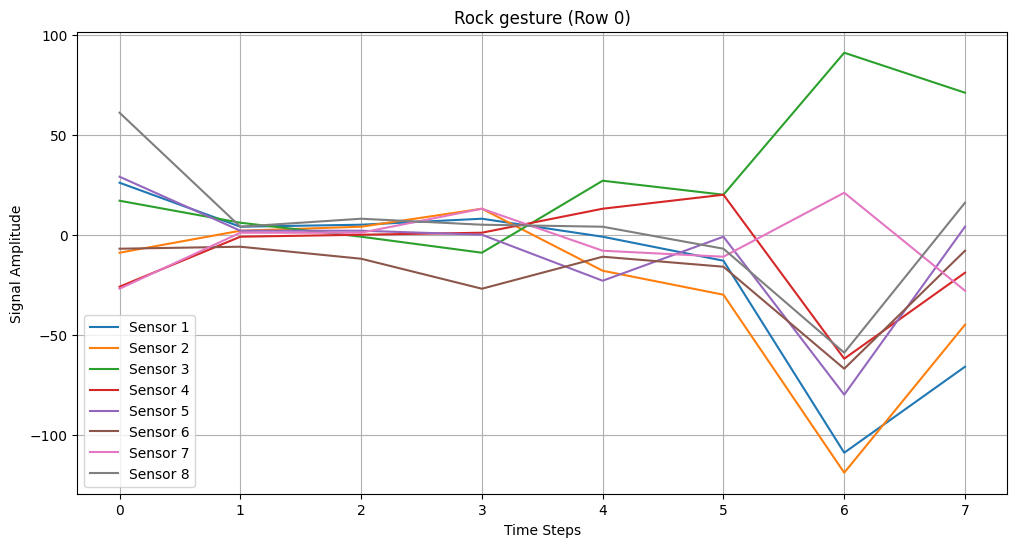

In [11]:
plot_time_signals(rock_df, row_index=0, title='Rock gesture')

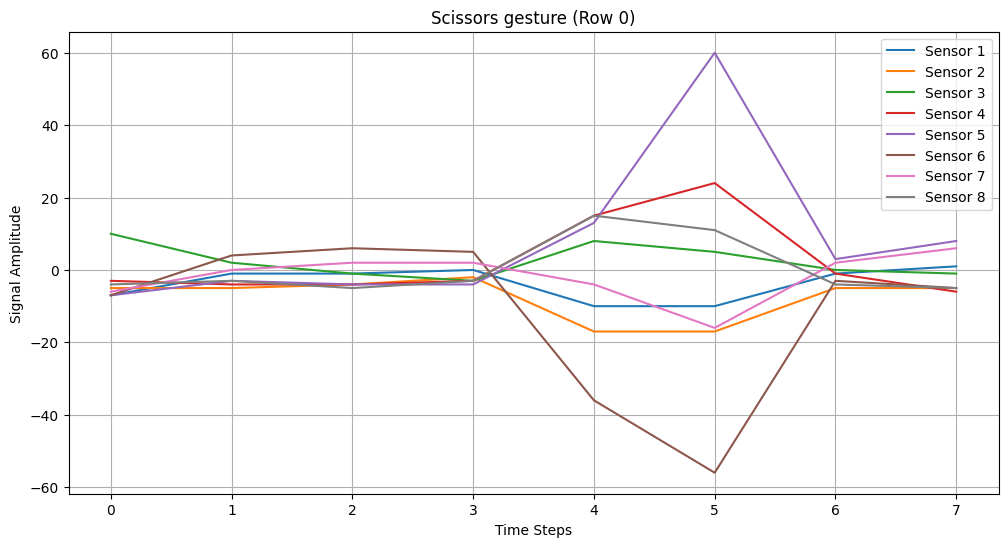

In [12]:
plot_time_signals(scissors_df, row_index=0, title='Scissors gesture')

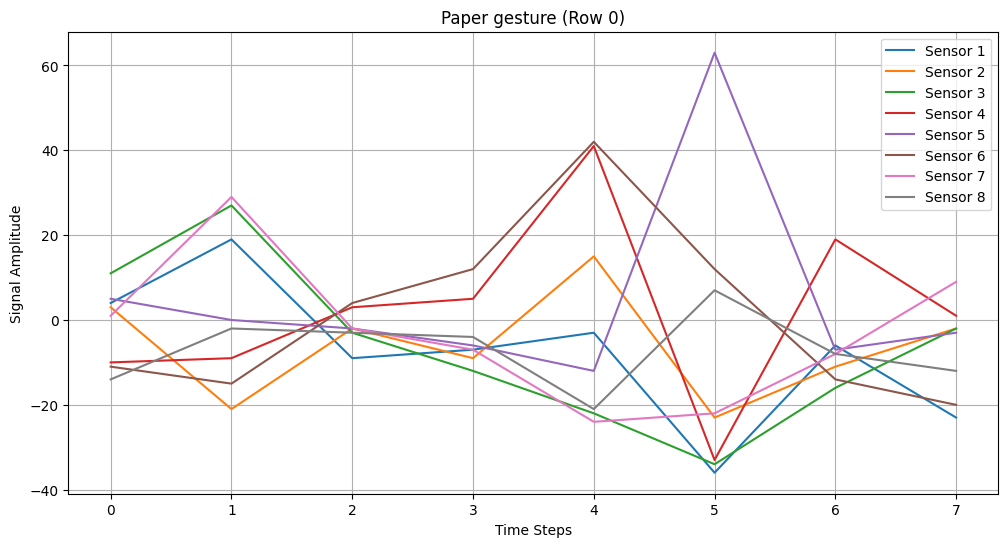

In [13]:
plot_time_signals(paper_df, row_index=0, title='Paper gesture')

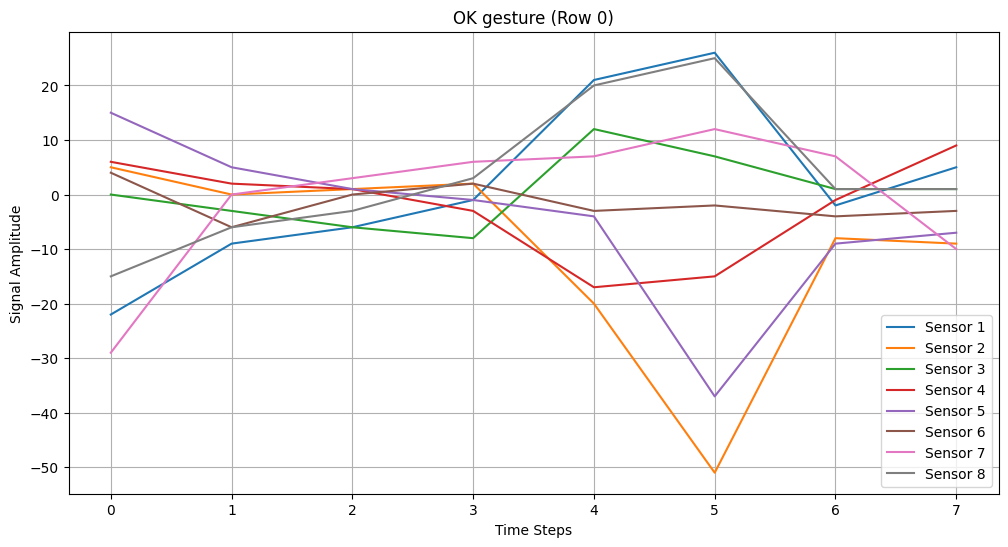

In [14]:
plot_time_signals(ok_df, row_index=0, title='OK gesture')

## Class distribution

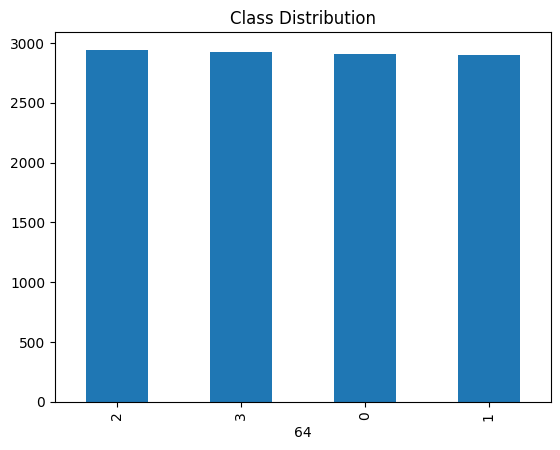

In [15]:
df.iloc[:, -1].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

## Sensor correlation analysis

/tmp/ipykernel_30/480784894.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sensor_means = sensor_data.groupby(np.arange(sensor_data.shape[1]) // 8, axis=1).mean()


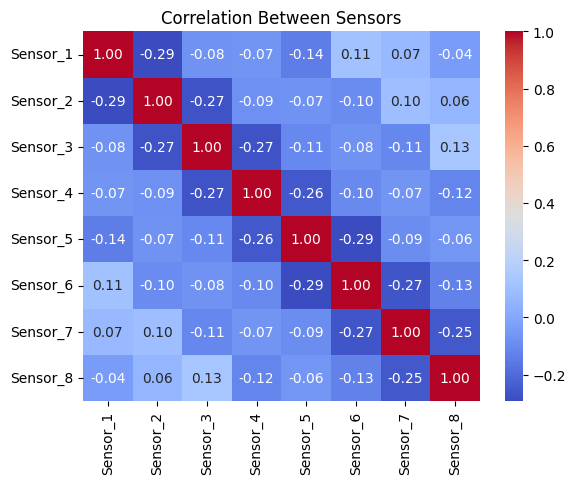

In [16]:
sensor_means = sensor_data.groupby(np.arange(sensor_data.shape[1]) // 8, axis=1).mean()

sensor_means.columns = [f"Sensor_{i+1}" for i in range(8)]

correlation = sensor_means.corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sensors")
plt.show()

## Dimensionality Reduction

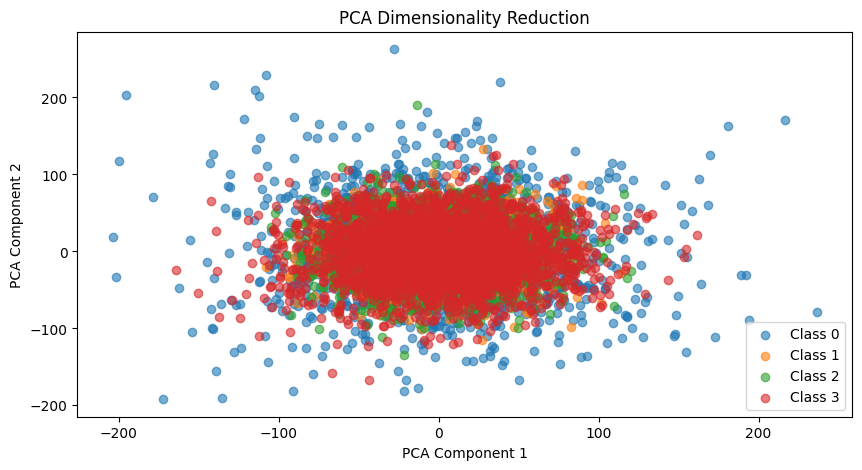

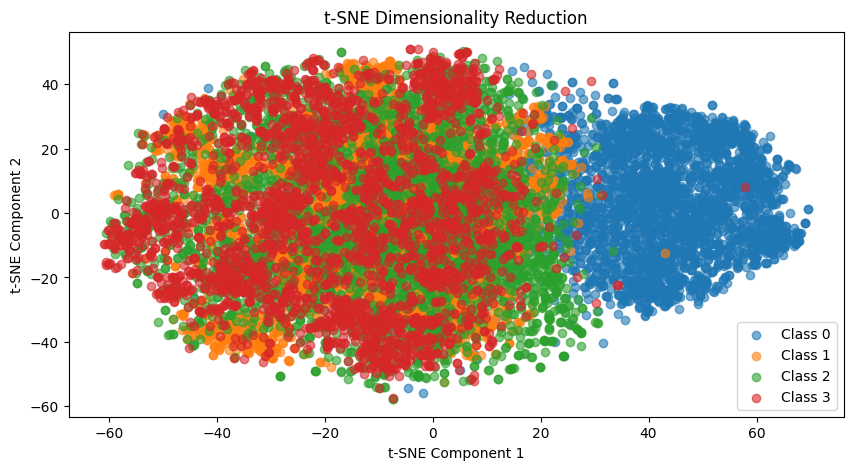

In [17]:
# PCA Dimensionality Reduction to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sensor_data)

# Plot PCA results
plt.figure(figsize=(10, 5))
for class_id in np.unique(labels):
    plt.scatter(pca_result[labels == class_id, 0], pca_result[labels == class_id, 1], label=f'Class {class_id}', alpha=0.6)
plt.title("PCA Dimensionality Reduction")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# t-SNE Dimensionality Reduction to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(sensor_data)

# Plot t-SNE results
plt.figure(figsize=(10, 5))
for class_id in np.unique(labels):
    plt.scatter(tsne_result[labels == class_id, 0], tsne_result[labels == class_id, 1], label=f'Class {class_id}', alpha=0.6)
plt.title("t-SNE Dimensionality Reduction")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

## Spectal Analysis

In [18]:
def spectral_analysis_overall(dataframe):
    num_sensors = 8
    time_steps_per_sensor = dataframe.shape[1] // num_sensors

    # Separate gesture class and sensor data
    gesture_classes = dataframe.iloc[:, -1]
    sensor_data = dataframe.iloc[:, :-1]
    
    # Prepare to store FFT results for each sensor
    fft_results = {f'Sensor_{i+1}': [] for i in range(num_sensors)}

    # Loop over all rows and accumulate FFT results per sensor
    for index, row in sensor_data.iterrows():
        signals = np.array_split(row.values, num_sensors)
        for i, signal in enumerate(signals):
            fft_result = np.abs(fft(signal))[:time_steps_per_sensor // 2]  # Positive frequencies only
            fft_results[f'Sensor_{i+1}'].append(fft_result)
    
    # Compute average FFT amplitude for each sensor
    avg_fft_results = {sensor: np.mean(fft_results[sensor], axis=0) for sensor in fft_results}

    # Plot average FFT for each sensor
    plt.figure(figsize=(15, 10))
    for sensor, avg_fft in avg_fft_results.items():
        freqs = fftfreq(time_steps_per_sensor, d=1/200)[:time_steps_per_sensor // 2]  # Positive frequencies
        plt.plot(freqs, avg_fft, label=sensor)
    
    plt.title("Average Spectral Analysis for All Sensors")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Now analyze by gesture class
    unique_classes = np.unique(gesture_classes)
    plt.figure(figsize=(15, 10))
    for gesture_class in unique_classes:
        class_subset = dataframe[dataframe.iloc[:, -1] == gesture_class]
        class_fft_results = {f'Sensor_{i+1}': [] for i in range(num_sensors)}
        for _, row in class_subset.iloc[:, :-1].iterrows():
            signals = np.array_split(row.values, num_sensors)
            for i, signal in enumerate(signals):
                fft_result = np.abs(fft(signal))[:time_steps_per_sensor // 2]
                class_fft_results[f'Sensor_{i+1}'].append(fft_result)
        # Average across this class
        avg_class_fft = np.mean([np.mean(class_fft_results[sensor], axis=0) for sensor in class_fft_results], axis=0)
        freqs = fftfreq(time_steps_per_sensor, d=1/200)[:time_steps_per_sensor // 2]
        plt.plot(freqs, avg_class_fft, label=f"Class {gesture_class}")

    plt.title("Average Spectral Analysis by Gesture Class")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

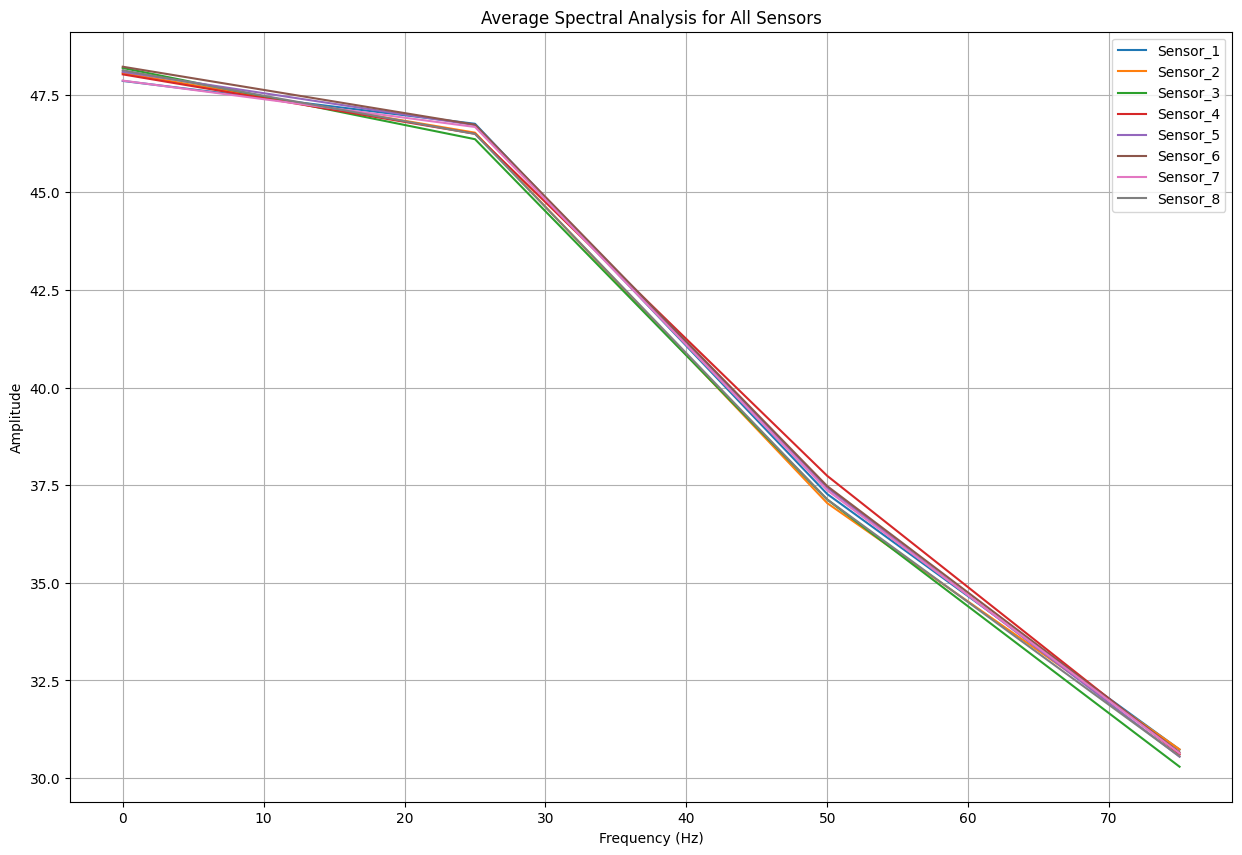

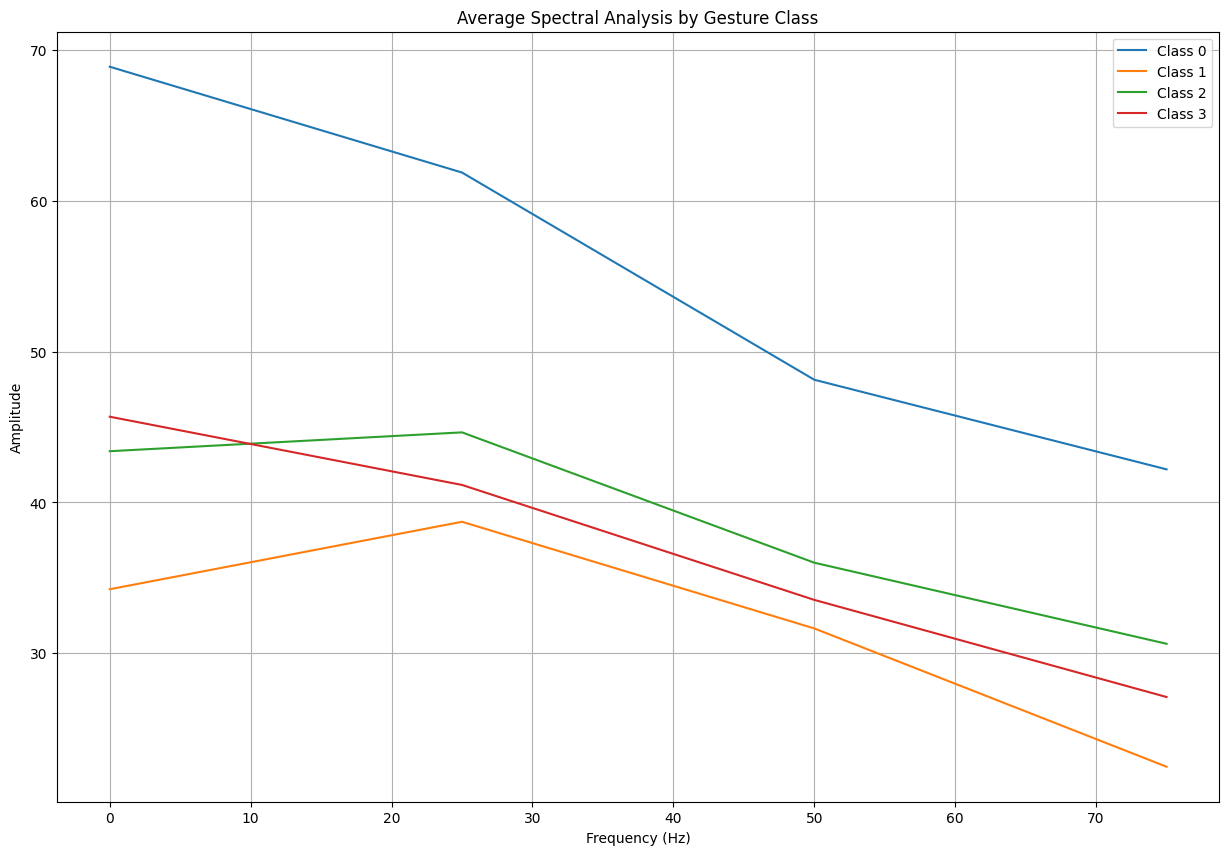

In [19]:
spectral_analysis_overall(df)

## Train networks

In [20]:
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

In [21]:
X.max(), X.min()

(127.0, -128.0)

In [22]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [23]:
X.max(), X.min()

(13.23654278045886, -13.295881402478306)

In [24]:
X_four_sensors = X[:, ::2]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_four_sensors_train, X_four_sensors_test, y_four_sensors_train, y_four_sensors_test = train_test_split(X_four_sensors, y, test_size=0.2)

## Classical models

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr_grid = {'max_depth' : [4, 8, 16, 32, 64, 128],
           'criterion' : ['entropy', 'gini']}

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator=clf, param_grid=lr_grid, cv=5)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)

In [28]:
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       545
           1       0.94      0.93      0.93       615
           2       0.93      0.93      0.93       607
           3       0.90      0.88      0.89       569

    accuracy                           0.93      2336
   macro avg       0.93      0.93      0.93      2336
weighted avg       0.93      0.93      0.93      2336

Confusion Matrix: 
 [[532   0   5   8]
 [  1 572  17  25]
 [  6  15 565  21]
 [ 28  24  19 498]]


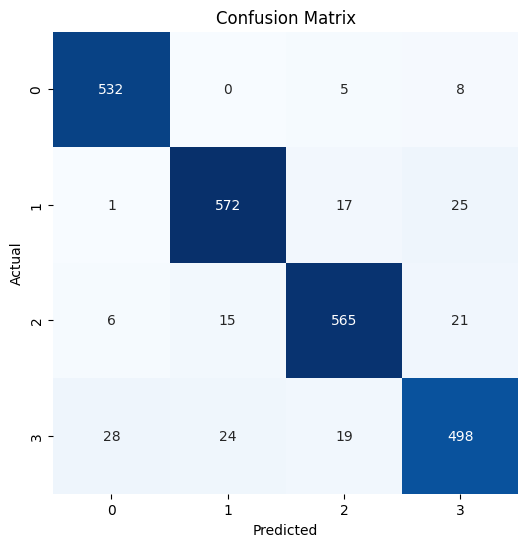

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Try with only four sensors:

In [30]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator=clf, param_grid=lr_grid, cv=5)
gs.fit(X_four_sensors_train, y_four_sensors_train)
y_pred = gs.predict(X_four_sensors_test)

In [31]:
print('Classification Report: \n', classification_report(y_four_sensors_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_four_sensors_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       597
           1       0.93      0.93      0.93       557
           2       0.83      0.77      0.80       591
           3       0.78      0.78      0.78       591

    accuracy                           0.86      2336
   macro avg       0.86      0.86      0.86      2336
weighted avg       0.86      0.86      0.86      2336

Confusion Matrix: 
 [[570   0   8  19]
 [  0 518  20  19]
 [ 14  25 457  95]
 [ 52  15  63 461]]


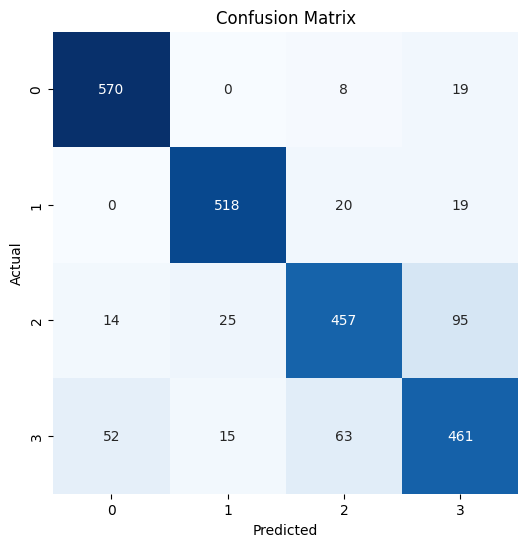

In [32]:
cm = confusion_matrix(y_four_sensors_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Deep Learning

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [34]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 1024)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(1024, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x

In [35]:
input_size = X_train.shape[1]
output_size = 4
batch_size = 32
epochs = 50
learning_rate = 0.001

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = NeuralNet(input_size, output_size)
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

NeuralNet(
  (fc1): Linear(in_features=64, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=1024, out_features=4, bias=True)
)

In [36]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step(running_loss / total)
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1/50, Loss: 1.0500, Accuracy: 69.48%
Epoch 2/50, Loss: 0.8515, Accuracy: 89.42%
Epoch 3/50, Loss: 0.8240, Accuracy: 92.10%
Epoch 4/50, Loss: 0.8116, Accuracy: 93.27%
Epoch 5/50, Loss: 0.8076, Accuracy: 93.56%
Epoch 6/50, Loss: 0.7978, Accuracy: 94.53%
Epoch 7/50, Loss: 0.7924, Accuracy: 94.96%
Epoch 8/50, Loss: 0.7910, Accuracy: 95.24%
Epoch 9/50, Loss: 0.7869, Accuracy: 95.68%
Epoch 10/50, Loss: 0.7887, Accuracy: 95.44%
Epoch 11/50, Loss: 0.7922, Accuracy: 95.10%
Epoch 12/50, Loss: 0.7908, Accuracy: 95.22%
Epoch 13/50, Loss: 0.7916, Accuracy: 95.24%
Epoch 14/50, Loss: 0.7884, Accuracy: 95.49%
Epoch 15/50, Loss: 0.7803, Accuracy: 96.26%
Epoch 16/50, Loss: 0.7909, Accuracy: 95.19%
Epoch 17/50, Loss: 0.7846, Accuracy: 95.92%
Epoch 18/50, Loss: 0.7809, Accuracy: 96.19%
Epoch 19/50, Loss: 0.7834, Accuracy: 95.96%
Epoch 20/50, Loss: 0.7815, Accuracy: 96.20%
Epoch 21/50, Loss: 0.7863, Accuracy: 95.66%
Epoch 22/50, Loss: 0.7846, Accuracy: 95.83%
Epoch 23/50, Loss: 0.7827, Accuracy: 96.1

In [37]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    _, predicted = outputs.max(1)
    test_accuracy = predicted.eq(y_test_tensor).sum().item() / y_test_tensor.size(0) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 94.31%


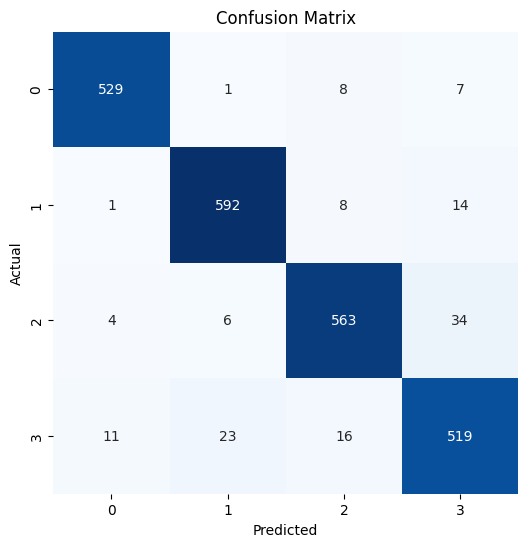

In [38]:
cm = confusion_matrix(y_test, predicted.cpu())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Try with 4 sensors instead of 8:

In [39]:
input_size = X_four_sensors_train.shape[1]
output_size = 4
batch_size = 32
epochs = 50
learning_rate = 0.001

X_train_tensor = torch.tensor(X_four_sensors_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_four_sensors_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_four_sensors_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_four_sensors_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = NeuralNet(input_size, output_size)
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

NeuralNet(
  (fc1): Linear(in_features=32, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=1024, out_features=4, bias=True)
)

In [40]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step(running_loss / total)
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1/50, Loss: 1.1193, Accuracy: 61.74%
Epoch 2/50, Loss: 0.9554, Accuracy: 78.86%
Epoch 3/50, Loss: 0.9215, Accuracy: 82.10%
Epoch 4/50, Loss: 0.8998, Accuracy: 84.32%
Epoch 5/50, Loss: 0.8875, Accuracy: 85.53%
Epoch 6/50, Loss: 0.8795, Accuracy: 86.31%
Epoch 7/50, Loss: 0.8769, Accuracy: 86.56%
Epoch 8/50, Loss: 0.8667, Accuracy: 87.52%
Epoch 9/50, Loss: 0.8587, Accuracy: 88.49%
Epoch 10/50, Loss: 0.8574, Accuracy: 88.56%
Epoch 11/50, Loss: 0.8605, Accuracy: 88.14%
Epoch 12/50, Loss: 0.8595, Accuracy: 88.25%
Epoch 13/50, Loss: 0.8500, Accuracy: 89.31%
Epoch 14/50, Loss: 0.8478, Accuracy: 89.46%
Epoch 15/50, Loss: 0.8487, Accuracy: 89.37%
Epoch 16/50, Loss: 0.8439, Accuracy: 90.06%
Epoch 17/50, Loss: 0.8440, Accuracy: 89.79%
Epoch 18/50, Loss: 0.8423, Accuracy: 90.03%
Epoch 19/50, Loss: 0.8386, Accuracy: 90.38%
Epoch 20/50, Loss: 0.8388, Accuracy: 90.44%
Epoch 21/50, Loss: 0.8366, Accuracy: 90.59%
Epoch 22/50, Loss: 0.8387, Accuracy: 90.43%
Epoch 23/50, Loss: 0.8324, Accuracy: 91.0

In [41]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    _, predicted = outputs.max(1)
    test_accuracy = predicted.eq(y_test_tensor).sum().item() / y_test_tensor.size(0) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 85.79%


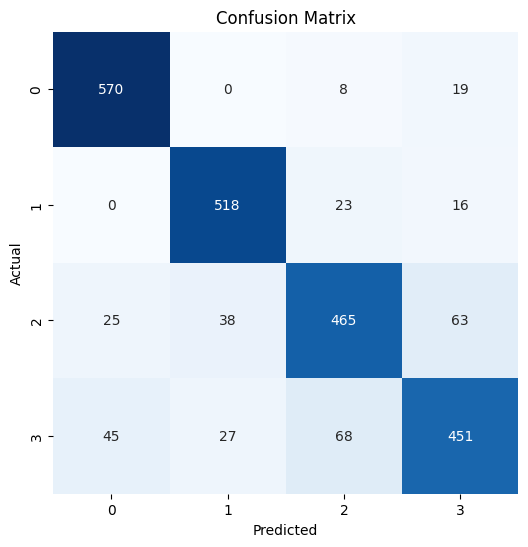

In [42]:
cm = confusion_matrix(y_four_sensors_test, predicted.cpu())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Deep Learning after DWT

In [43]:
import pywt
import numpy as np

def apply_dwt_to_dataset(data, wavelet='db4', level=3):
    """
    Apply Discrete Wavelet Transform (DWT) to each sensor's time-series data in the dataset.

    Args:
        data (pd.DataFrame): Dataframe containing time-series data (sensor readings).
        wavelet (str): Type of wavelet to use (e.g., 'db4').
        level (int): Level of decomposition.

    Returns:
        np.ndarray: Feature matrix of wavelet coefficients.
    """
    num_sensors = 8
    features = []

    for _, row in data.iterrows():
        signals = np.array_split(row.values[:-1], num_sensors)  # Exclude the gesture class column
        row_features = []

        for signal in signals:
            coeffs = pywt.wavedec(signal, wavelet, level=level)  # Decompose signal
            # Flatten coefficients (e.g., approximations and details)
            row_features.extend(np.hstack(coeffs))
        
        features.append(row_features)
    
    return np.array(features)

X_dwt = apply_dwt_to_dataset(df)
y_dwt = df.iloc[:, -1].values

/opt/conda/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [44]:
X_dwt_train, X_dwt_test, y_dwt_train, y_dwt_test = train_test_split(X_dwt, y_dwt, test_size=0.2)

In [45]:
class DWTNeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(DWTNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(512, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x

In [46]:
input_size = X_dwt_train.shape[1]
output_size = 4
batch_size = 32
epochs = 50
learning_rate = 0.001

X_dwt_train_tensor = torch.tensor(X_dwt_train, dtype=torch.float32)
y_dwt_train_tensor = torch.tensor(y_dwt_train, dtype=torch.long)
X_dwt_test_tensor = torch.tensor(X_dwt_test, dtype=torch.float32)
y_dwt_test_tensor = torch.tensor(y_dwt_test, dtype=torch.long)

train_dataset = TensorDataset(X_dwt_train_tensor, y_dwt_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = DWTNeuralNet(input_size, output_size)
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

DWTNeuralNet(
  (fc1): Linear(in_features=224, out_features=512, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)

In [47]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step(running_loss / total)
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1/50, Loss: 1.1822, Accuracy: 54.52%
Epoch 2/50, Loss: 1.0095, Accuracy: 72.68%
Epoch 3/50, Loss: 0.9618, Accuracy: 77.69%
Epoch 4/50, Loss: 0.9410, Accuracy: 79.77%
Epoch 5/50, Loss: 0.9422, Accuracy: 79.93%
Epoch 6/50, Loss: 0.9395, Accuracy: 80.19%
Epoch 7/50, Loss: 0.9428, Accuracy: 79.89%
Epoch 8/50, Loss: 0.9462, Accuracy: 79.61%
Epoch 9/50, Loss: 0.9523, Accuracy: 78.91%
Epoch 10/50, Loss: 0.9723, Accuracy: 77.07%
Epoch 11/50, Loss: 0.9711, Accuracy: 77.11%
Epoch 12/50, Loss: 0.9716, Accuracy: 77.15%
Epoch 13/50, Loss: 0.9881, Accuracy: 75.42%
Epoch 14/50, Loss: 0.9859, Accuracy: 75.67%
Epoch 15/50, Loss: 0.9625, Accuracy: 78.08%
Epoch 16/50, Loss: 0.9497, Accuracy: 79.35%
Epoch 17/50, Loss: 0.9665, Accuracy: 77.63%
Epoch 18/50, Loss: 0.9360, Accuracy: 80.69%
Epoch 19/50, Loss: 0.9217, Accuracy: 82.11%
Epoch 20/50, Loss: 0.9063, Accuracy: 83.67%
Epoch 21/50, Loss: 0.9027, Accuracy: 84.00%
Epoch 22/50, Loss: 0.8949, Accuracy: 84.81%
Epoch 23/50, Loss: 0.8921, Accuracy: 85.0

In [48]:
model.eval()
with torch.no_grad():
    X_dwt_test_tensor = X_dwt_test_tensor.to(device)
    y_dwt_test_tensor = y_dwt_test_tensor.to(device)
    outputs = model(X_dwt_test_tensor)
    _, predicted = outputs.max(1)
    test_accuracy = predicted.eq(y_test_tensor).sum().item() / y_test_tensor.size(0) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 26.24%


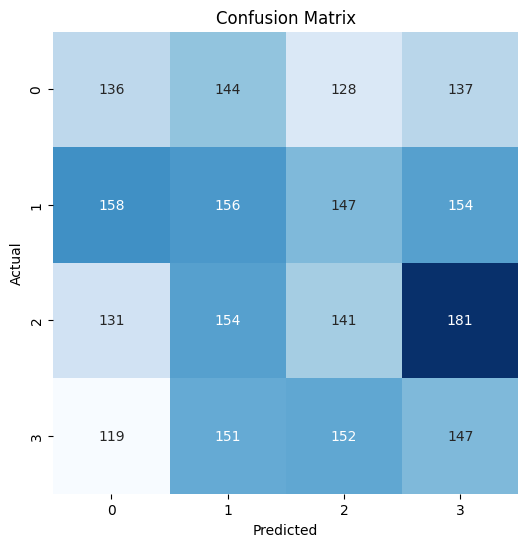

In [49]:
cm = confusion_matrix(y_test, predicted.cpu())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()